In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score

import random
import pickle
import gc

# Dataset Description
**Source:** [Online Shoppers Purchasing Intention Dataset Data Set](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset)

**Dataset Information:**
The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

### Attribute Information

**"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration"** represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

The value of **"Bounce Rate"** feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of **"Exit Rate"** feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The **"Page Value"** feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The **"Special Day"** feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [2]:
df = pd.read_csv('./data/online_shoppers_intention/online_shoppers_intention.csv')

In [14]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157213,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

In [7]:
print(len(df[df['Revenue'] == False]), len(df[df['Revenue'] == True]))
print('Proportion of ending with shopping: ', 1908/(10422+1908))

10422 1908
Proportion of ending with shopping:  0.15474452554744525


Only 10 months are included in this dataset.

In [9]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

Below is the heatmap of the correlation between each attritubes, we can find that the "Revenue" attritube is most correlated to the "PageValues" attritube.

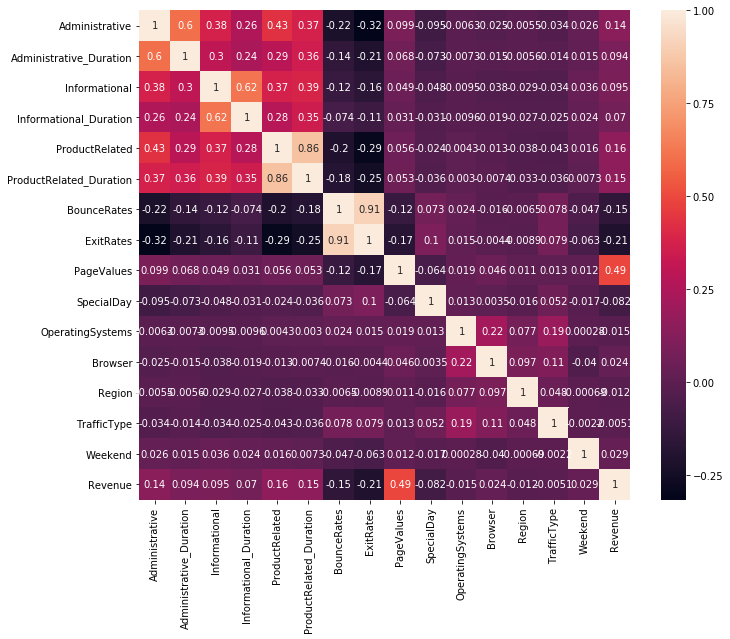

In [10]:
df_cpy = df.copy()
plt.figure(figsize=(11, 9))
sns.heatmap(df_cpy.corr(), annot=True)

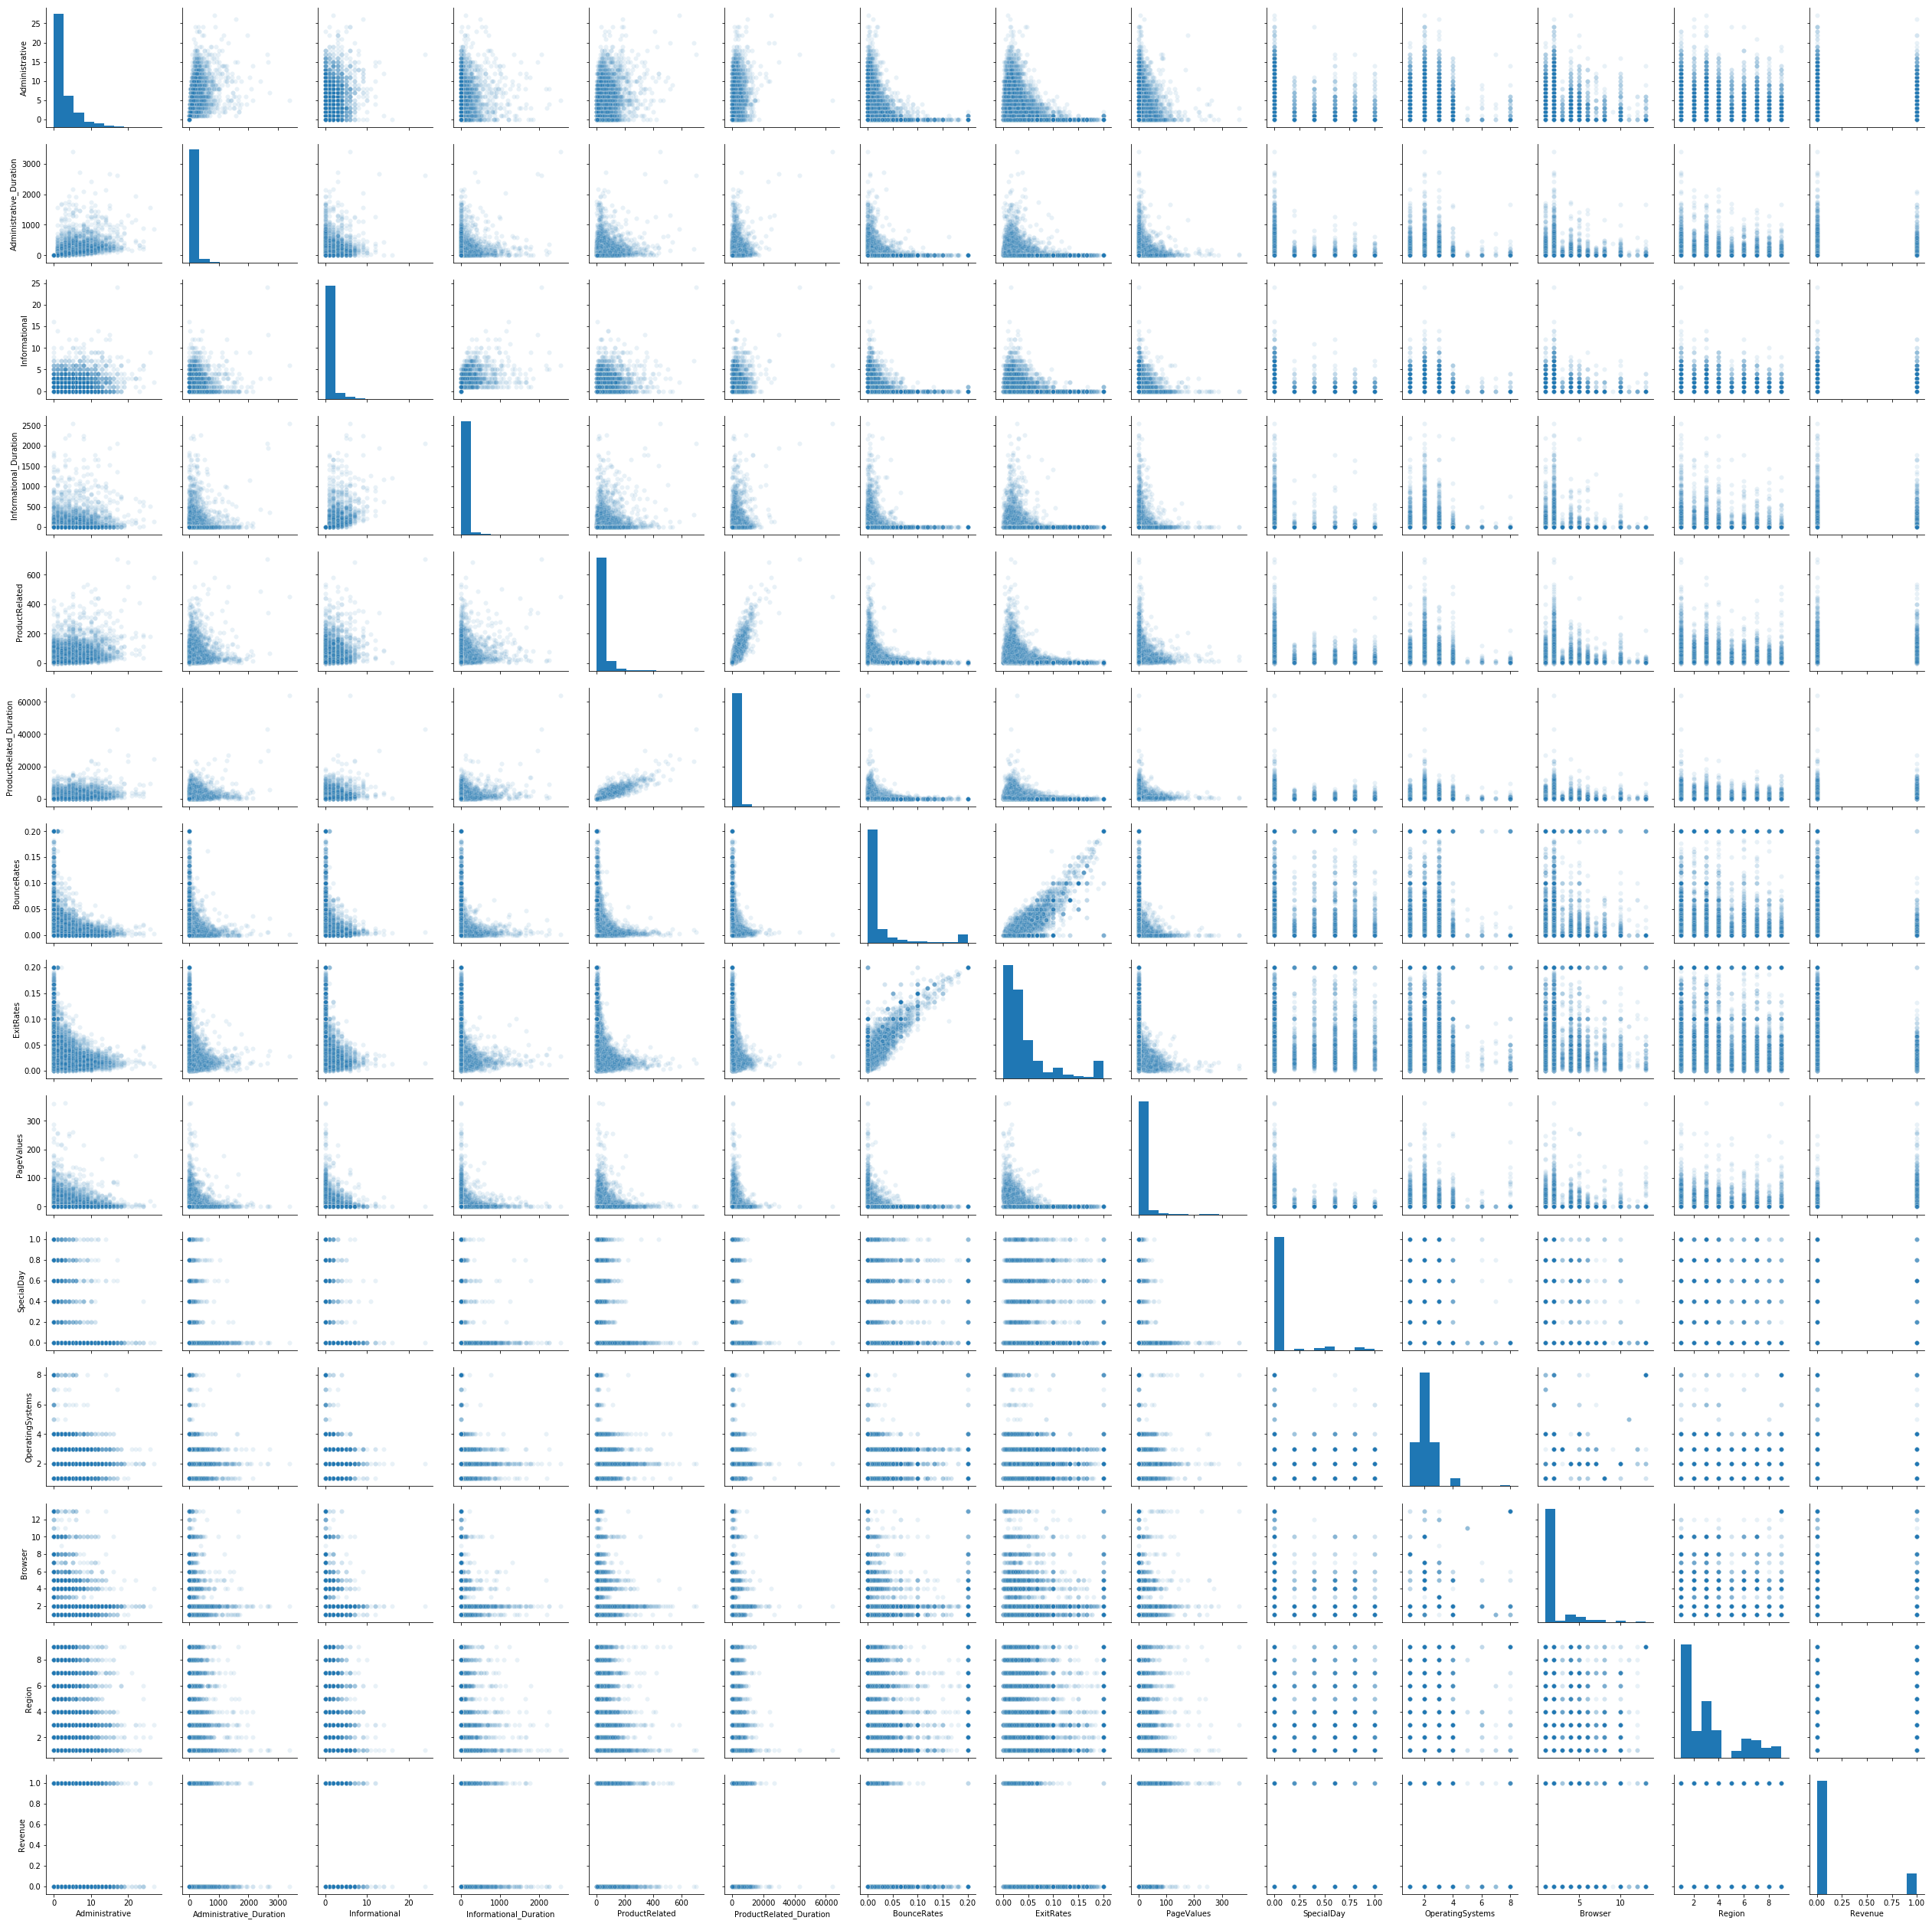

In [18]:
sns.pairplot(data=df.drop(['Month', 'VisitorType', 'Weekend', 'TrafficType'], axis=1), plot_kws={'alpha':0.1})

Calculate the average revenue in each month. We can wee that November has higest revenue rate, while February has lowest.

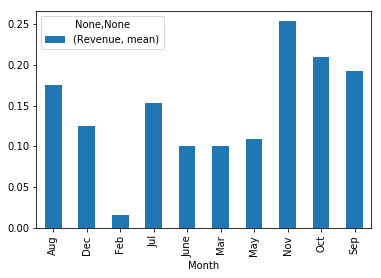

In [10]:
df.groupby('Month').agg({'Revenue': ['mean']}).plot(kind='bar')

New visitors has larger revenue rate than returning visitors.

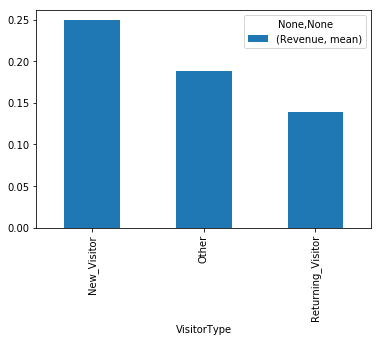

In [11]:
df.groupby('VisitorType').agg({'Revenue': ['mean']}).plot(kind='bar')

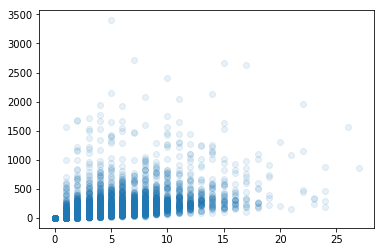

In [23]:
plt.scatter(df['Administrative'], df['Administrative_Duration'], alpha=0.1)

# Define a Problem

**One problem we can define for this dataset is a classification problem: by training a model with the features provided in the dataset to predict whether a session will end with shopping or not.**

# Data Preprocessing

In [3]:
df = pd.get_dummies(df)

In [9]:
df.tail(10).T

,12320,12321,12322,12323,12324,12325,12326,12327,12328,12329
Administrative,0.000000,0.0,6.000000,2.000000,0.000000,3.000000,0.000000,0.000000,4.000000,0.000000
Administrative_Duration,0.000000,0.0,76.250000,64.750000,0.000000,145.000000,0.000000,0.000000,75.000000,0.000000
Informational,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Informational_Duration,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ProductRelated,8.000000,6.0,22.000000,44.000000,16.000000,53.000000,5.000000,6.000000,15.000000,3.000000
ProductRelated_Duration,143.583333,0.0,1075.250000,1157.976190,503.000000,1783.791667,465.750000,184.250000,346.000000,21.250000
BounceRates,0.014286,0.2,0.000000,0.000000,0.000000,0.007143,0.000000,0.083333,0.000000,0.000000
ExitRates,0.050000,0.2,0.004167,0.013953,0.037647,0.029031,0.021333,0.086667,0.021053,0.066667
PageValues,0.000000,0.0,0.000000,0.000000,0.000000,12.241717,0.000000,0.000000,0.000000,0.000000
SpecialDay,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder

# df['Month'] = LabelEncoder().fit_transform(df['Month']).astype('int8')
# df['VisitorType'] = LabelEncoder().fit_transform(df['VisitorType']).astype('int8')
df['Weekend'] = LabelEncoder().fit_transform(df['Weekend']).astype('int8')
df['Revenue'] = LabelEncoder().fit_transform(df['Revenue']).astype('int8')

### Feature Extraction

In [8]:
df['Administrative_avg_Duration'] = (df['Administrative_Duration']/df['Administrative']).fillna(0)
df['Informational_avg_Duration'] = (df['Informational_Duration']/df['Informational']).fillna(0)
df['ProductRelated_avg_Duration'] = (df['ProductRelated_Duration']/df['ProductRelated']).fillna(0)

df['totalTime'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']
df['totalPages'] = df['Administrative'] + df['Informational'] + df['ProductRelated']
df['avg_time'] = (df['totalTime']/df['totalPages']).fillna(0)

df['Administrative_proportion'] = (df['Administrative_Duration']/df['totalTime']).fillna(0)
df['Informational_proportion'] = (df['Informational_Duration']/df['totalTime']).fillna(0)
df['ProductRelated_proportion'] = (df['ProductRelated_Duration']/df['totalTime']).fillna(0)

df['Administrative_cnt_proportion'] = (df['Administrative']/df['totalPages']).fillna(0)
df['Informational_cnt_proportion'] = (df['Informational']/df['totalPages']).fillna(0)
df['ProductRelated_cnt_proportion'] = (df['ProductRelated']/df['totalPages']).fillna(0)

In [10]:
df.to_pickle('./data/online_shoppers_intention/data.pkl')

# A Baseline Model

In [11]:
data = pd.read_pickle('./data/online_shoppers_intention/data.pkl')

In [15]:
df = data[[
    'Administrative',
    'Administrative_Duration',
    'Informational',
    'Informational_Duration',
    'ProductRelated',
    'ProductRelated_Duration',
    'BounceRates',
    'ExitRates',
    'PageValues',
#     'SpecialDay',
#     'OperatingSystems',
#     'Browser',
#     'Region',
    'TrafficType',
#     'Weekend',
#     'Month_Aug',
#     'Month_Dec',
#     'Month_Feb',
#     'Month_Jul',
#     'Month_June',
    'Month_Mar',
    'Month_May',
    'Month_Nov',
#     'Month_Oct',
#     'Month_Sep',
#     'VisitorType_New_Visitor',
#     'VisitorType_Other',
#     'VisitorType_Returning_Visitor',
    'Administrative_avg_Duration',
    'Informational_avg_Duration',
    'ProductRelated_avg_Duration',
    'totalTime',
    'totalPages',
    'Administrative_proportion',
    'Informational_proportion',
    'ProductRelated_proportion',
    'Administrative_cnt_proportion',
    'Informational_cnt_proportion',
    'ProductRelated_cnt_proportion',
    'avg_time',
    'Revenue'
]]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Revenue', axis=1), df.Revenue, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Logistic Regression

In [30]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_valid = StandardScaler().fit_transform(X_valid)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarni

In [31]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
pred_clf_train = clf.predict(X_train)
pred_clf_test = clf.predict(X_test)
pred_clf_valid = clf.predict(X_valid)
print(confusion_matrix(y_test, pred_clf_test))
print('Accuracy: ', accuracy_score(y_test, pred_clf_test))
print('Recall: ', recall_score(y_test, pred_clf_test))
print('f1_score: ', recall_score(y_test, pred_clf_test))

[[2007   48]
 [ 270  141]]
Accuracy:  0.8710462287104623
Recall:  0.34306569343065696
f1_score:  0.34306569343065696


The prediction from basic logistic regression give a result of Accuracy=86.6% and Recall=33%. Here we are care more about the recall score, which can reflect the ablitity of finding which user will end with shopping. The recall score of the logistic regression model is not good enough, so we need to try other methods to improve it.

# Improvement

## Try Different Modeling Tools

### 1. LightGBM

In [17]:
list(X_train.columns)

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'TrafficType',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'Administrative_avg_Duration',
 'Informational_avg_Duration',
 'ProductRelated_avg_Duration',
 'totalTime',
 'totalPages',
 'Administrative_proportion',
 'Informational_proportion',
 'ProductRelated_proportion',
 'Administrative_cnt_proportion',
 'Informational_cnt_proportion',
 'ProductRelated_cnt_proportion',
 'avg_time']

In [18]:
import lightgbm as lgb
train_data=lgb.Dataset(X_train, label=y_train)
valid_data=lgb.Dataset(X_valid, label=y_valid)

params = {'boosting_type': 'gbdt',
          'max_depth' : 10,
          'objective': 'regression',
          'nthread': 5,
          'num_leaves': 64,
          'learning_rate': 0.01,
          'subsample': 0.8,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'min_split_gain': 0.5,
          'min_child_weight': 30,
          'min_child_samples': 1,
          'metric': 'rmse'
          }

lgbm = lgb.train(params,
                 train_data,
                 25000,
                 valid_sets=[train_data, valid_data],
                 early_stopping_rounds= 30,
                 verbose_eval= 20
                 )

Training until validation scores don't improve for 30 rounds.
[20]	training's rmse: 0.331609	valid_1's rmse: 0.338746
[40]	training's rmse: 0.307457	valid_1's rmse: 0.319219
[60]	training's rmse: 0.288561	valid_1's rmse: 0.30455
[80]	training's rmse: 0.275626	valid_1's rmse: 0.295331
[100]	training's rmse: 0.265111	valid_1's rmse: 0.288087
[120]	training's rmse: 0.256698	valid_1's rmse: 0.283005
[140]	training's rmse: 0.251163	valid_1's rmse: 0.279947
[160]	training's rmse: 0.247158	valid_1's rmse: 0.277896
[180]	training's rmse: 0.243835	valid_1's rmse: 0.276373
[200]	training's rmse: 0.241646	valid_1's rmse: 0.27543
[220]	training's rmse: 0.240003	valid_1's rmse: 0.274836
[240]	training's rmse: 0.238954	valid_1's rmse: 0.274389
[260]	training's rmse: 0.238123	valid_1's rmse: 0.274111
[280]	training's rmse: 0.237573	valid_1's rmse: 0.273933
[300]	training's rmse: 0.237239	valid_1's rmse: 0.273907
[320]	training's rmse: 0.236987	valid_1's rmse: 0.27384
[340]	training's rmse: 0.236828	v

In [19]:
pred_lgb_train = (lgbm.predict(X_train) > 0.5).astype('int8')
pred_lgb_test = (lgbm.predict(X_test) > 0.5).astype('int8')
pred_lgb_valid = (lgbm.predict(X_valid) > 0.5).astype('int8')
print(confusion_matrix(y_test, pred_lgb_test))
print('Accuracy: ', accuracy_score(y_test, pred_lgb_test))
print('Recall: ', recall_score(y_test, pred_lgb_test))
print('f1_score: ', recall_score(y_test, pred_lgb_test))

[[1978   77]
 [ 176  235]]
Accuracy:  0.897404703974047
Recall:  0.5717761557177615
f1_score:  0.5717761557177615


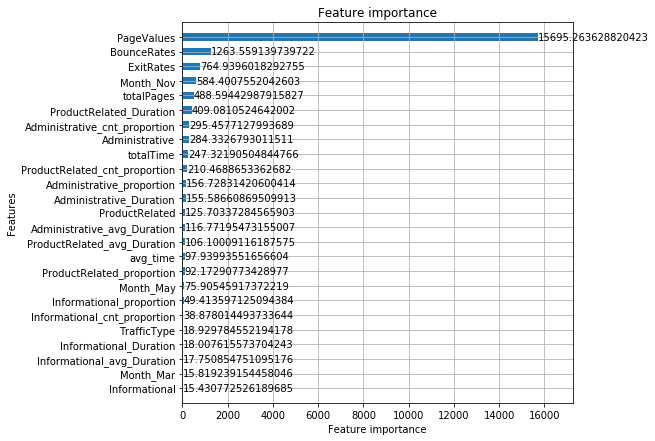

In [20]:
lgb.plot_importance(lgbm, height=0.5, ignore_zero = False, figsize = (7, 7), importance_type ='gain')

### 2. Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
RFC.fit(X_train, y_train)

# RFC = RandomForestClassifier()
# RFC.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [22]:
pred_rfc_train = (RFC.predict(X_train) > 0.5).astype('int8')
pred_rfc_test = (RFC.predict(X_test) > 0.5).astype('int8')
pred_rfc_valid = (RFC.predict(X_valid) > 0.5).astype('int8')
print(confusion_matrix(y_test, pred_rfc_test))
print('Accuracy: ', accuracy_score(y_test, pred_rfc_test))
print('Recall: ', recall_score(y_test, pred_rfc_test))
print('f1_score: ', recall_score(y_test, pred_rfc_test))

[[1978   77]
 [ 188  223]]
Accuracy:  0.8925385239253852
Recall:  0.5425790754257908
f1_score:  0.5425790754257908


### 3. XGboost

In [23]:
from xgboost import XGBClassifier
from xgboost import plot_importance

xgb = XGBClassifier(
    max_depth=12,
    n_estimators=1000,
    min_child_weight=100, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)

xgb.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_valid, y_valid)], 
    verbose=20, 
    early_stopping_rounds = 30)

[0]	validation_0-rmse:0.473627	validation_1-rmse:0.474234
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 30 rounds.
[20]	validation_0-rmse:0.26615	validation_1-rmse:0.284726
[40]	validation_0-rmse:0.256117	validation_1-rmse:0.277968
[60]	validation_0-rmse:0.253754	validation_1-rmse:0.277057
[80]	validation_0-rmse:0.252781	validation_1-rmse:0.27702
Stopping. Best iteration:
[55]	validation_0-rmse:0.254056	validation_1-rmse:0.276819



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, eta=0.3, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=12, min_child_weight=100, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=0.8)

In [24]:
pred_xgb_train = (xgb.predict(X_train) > 0.5).astype('int8')
pred_xgb_test = (xgb.predict(X_test) > 0.5).astype('int8')
pred_xgb_valid = (xgb.predict(X_valid) > 0.5).astype('int8')
print(confusion_matrix(y_test, pred_xgb_test))
print('Accuracy: ', accuracy_score(y_test, pred_xgb_test))
print('Recall: ', recall_score(y_test, pred_xgb_test))
print('f1_score: ', recall_score(y_test, pred_xgb_test))

[[1963   92]
 [ 175  236]]
Accuracy:  0.8917274939172749
Recall:  0.5742092457420924
f1_score:  0.5742092457420924


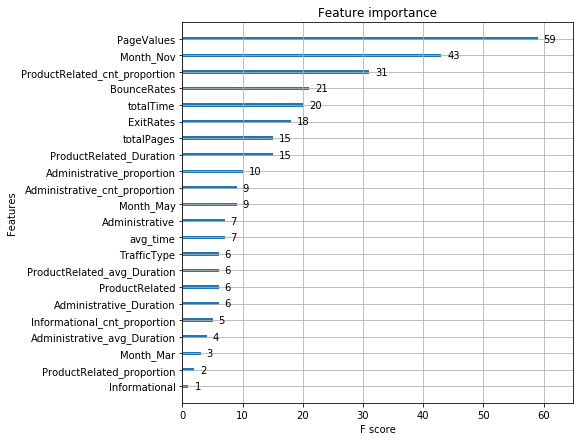

In [25]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
plot_importance(booster=xgb, ax=ax)

## Try Model Ensembling

### 1. Ensembling (LightGBM + Random Forest + XGboost)

In [26]:
pred_train = pd.DataFrame({'rfc': pred_rfc_train, 'lgb': pred_lgb_train, 'xgb': pred_xgb_train})
pred_test = pd.DataFrame({'rfc': pred_rfc_test, 'lgb': pred_lgb_test, 'xgb':pred_xgb_test})
pred_valid = pd.DataFrame({'rfc': pred_rfc_valid, 'lgb': pred_lgb_valid, 'xgb':pred_xgb_valid})

In [27]:
ensemble = XGBClassifier(
    max_depth=12,
    n_estimators=1000,
    min_child_weight=100, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)

ensemble.fit(
    pred_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(pred_train, y_train), (pred_valid, y_valid)], 
    verbose=20, 
    early_stopping_rounds = 30)

[0]	validation_0-rmse:0.463461	validation_1-rmse:0.466042
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 30 rounds.
[20]	validation_0-rmse:0.096467	validation_1-rmse:0.296804
[40]	validation_0-rmse:0.064958	validation_1-rmse:0.30289
Stopping. Best iteration:
[17]	validation_0-rmse:0.128377	validation_1-rmse:0.294725



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, eta=0.3, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=12, min_child_weight=100, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=0.8)

In [28]:
pred_ensemble = (ensemble.predict(pred_test) > 0.5).astype('int8')
print(confusion_matrix(y_test, pred_ensemble))
print('Accuracy: ', accuracy_score(y_test, pred_ensemble))
print('Recall: ', recall_score(y_test, pred_ensemble))
print('f1_score: ', recall_score(y_test, pred_ensemble))

[[1978   77]
 [ 188  223]]
Accuracy:  0.8925385239253852
Recall:  0.5425790754257908
f1_score:  0.5425790754257908


### 2. Voting

In [33]:
pred_vote = ((pred_clf_test + pred_rfc_test + pred_lgb_test + pred_xgb_test) > 0).astype('int8')
print(confusion_matrix(y_test, pred_vote))
print('Accuracy: ', accuracy_score(y_test, pred_vote))
print('Recall: ', recall_score(y_test, pred_vote))
print('f1_score: ', recall_score(y_test, pred_vote))

[[1943  112]
 [ 146  265]]
Accuracy:  0.8953771289537713
Recall:  0.6447688564476886
f1_score:  0.6447688564476886


# Discussion

Finally Voting method with combination of above 4 models gives a highest Recall score of up to 65% (depends on the input data) and maintains a high accuarcy at the same time. The idea of the voting method is to sacrifice some accuracy of guessing 0, exchanging for the recall score. So I force it to predict 1 if any one of the above models predict 1, otherwise predict 0.